In [0]:
# Importing the required packages.
import pandas as pd # for file manipulation.
import matplotlib.pyplot as plt # Visualization.
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Scientific Computing.
from keras.models import Sequential # Deep Learning Library.
from keras.layers import Dense, LSTM, Dropout, Activation
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import time
import warnings

In [0]:
# Reading the data using pandas.
data = pd.read_csv('TSLA.csv')
# data.tail()
warnings.filterwarnings("ignore")

In [0]:
# Dropping the value of index 0, since LSTM does not consider the index value 0.
data = data.drop(data.index[0])
# data.head()

In [0]:
# Dropping the Date Column, since it is a useless data.
data = data.drop(['Date'], axis=1)
# data.head()

In [0]:
# Splitting the columns for input and Output.
initial = data.iloc[:,1:]
# initial.head()

In [0]:
# Open Column as the Output.
target = data.iloc[:, 0]
# target.head()

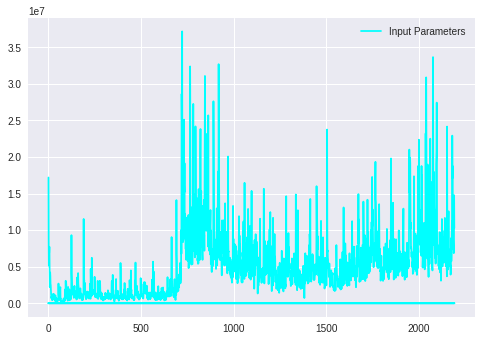

In [30]:
# Making the attributes(Features) into a numPY array.
initial = initial.values
initial = initial.astype('float32')
# print(initial)
plt.plot(initial, color='cyan')
plt.legend(['Input Parameters'], loc='upper right')
plt.show()

In [0]:
# Scaling the Data using MinMaxScaler.
scale = MinMaxScaler(feature_range = (0, 1))
# print(scale1)
initial = scale.fit_transform(data)
# print(initial)

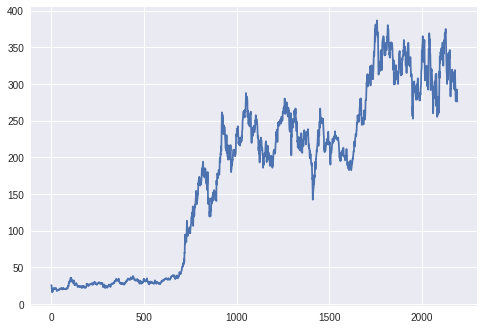

In [32]:
# Making the output into a numPY array.
target = target.values
plt.plot(target)

In [33]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing data.# Printing the Shape of the Data (Training and Testing Data).
X_train, X_test, Y_train, Y_test = train_test_split(initial, target, test_size=0.25, random_state=42)
# Printing the Shape of the Data (Training and Testing Data).
print("Shape of X_Train:", X_train.shape)
print("Shape of X_Test:", X_test.shape)
print("Shape of Y_Train:", Y_train.shape)
print("Shape of Y_Train:", Y_test.shape)
# Since the neural networks takes the 3D array as an input we should change the dimensions of the input 
# by using the np.reshape() function'''
print("After Reshaping:")
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print("Shape of X_Train:", X_train.shape)
print("Shape of X_Test:", X_test.shape)
print("Shape of Y_Train:", Y_train.shape)
print("Shape of Y_Train:", Y_test.shape)

Shape of X_Train: (1644, 6)
Shape of X_Test: (549, 6)
Shape of Y_Train: (1644,)
Shape of Y_Train: (549,)
After Reshaping:
Shape of X_Train: (1644, 1, 6)
Shape of X_Test: (549, 1, 6)
Shape of Y_Train: (1644,)
Shape of Y_Train: (549,)


In [34]:
model = Sequential() # Sequential Model
# We'll be using the LSTM for our analysis, since it is a time-series data.
model.add(LSTM(100,use_bias=True,recurrent_activation='hard_sigmoid',
               return_sequences=True))
model.add(Dropout(0.1)) # Dropout Layer for Regularization.

model.add(LSTM(100,use_bias=True,recurrent_activation='hard_sigmoid',
               return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(100,use_bias=True,
    return_sequences=False))
model.add(Dropout(0.1))


model.add(Dense(1))
model.add(Activation('relu')) # Activation function.

start = time.time()
# Compiling the model.
model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])
print('compilation time : ', time.time() - start)

compilation time :  0.015609025955200195


In [35]:
# fitting our data into the model.
model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.05)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1561 samples, validate on 83 samples
Epoch 1/1000
1561/1561 [==============================] - 3s 2ms/step - loss: 176.7282 - acc: 0.0000e+00 - val_loss: 176.2142 - val_acc: 0.0000e+00
Epoch 2/1000
1561/1561 [==============================] - 0s 310us/step - loss: 176.1783 - acc: 0.0000e+00 - val_loss: 175.6623 - val_acc: 0.0000e+00
Epoch 3/1000
1561/1561 [==============================] - 1s 330us/step - loss: 175.6236 - acc: 0.0000e+00 - val_loss: 175.1034 - val_acc: 0.0000e+00
Epoch 4/1000
1561/1561 [==============================] - 1s 322us/step - loss: 175.0604 - acc: 0.0000e+00 - val_loss: 174.5337 - val_acc: 0.0000e+00
Epoch 5/1000
1561/1561 [==============================] - 0s 319us/step - loss: 174.4820 - acc: 0.0000e+00 - val_loss: 173.9478 - val_acc: 0.0000e+00
Epoch 6/1000
1561/1561 [===================

[[29.836002]]
Test Score: 1.52 Error


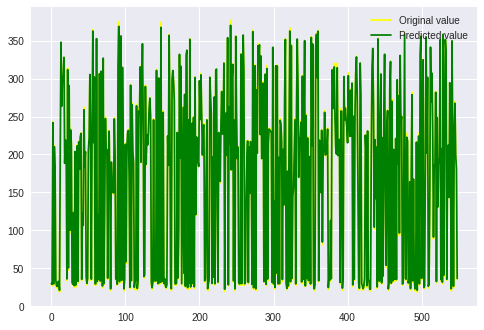

In [41]:
Predict = model.predict(X_test)
print(Predict[[0]])
testScore = (mean_absolute_error(Y_test, Predict))
print('Test Score: %.2f Error' % (testScore))
# accu = accuracy_score(X_test, Y_test)
# print("Accuracy: ", accu)
plt.plot(Y_test, color='yellow')
plt.plot(Predict, color='green')
plt.legend(['Original value','Predicted value'],loc='upper right')
plt.show()